In [47]:
# 시각화 도구
import matplotlib.pyplot as plt
# 텐서플로우
import tensorflow as tf
# 넘파이, 판다스
import numpy as np
import pandas as pd

In [48]:
assert hasattr(tf, "function") # 텐서플로우 2.0 이면 function 이 있다??

In [49]:
# keras에 있는 디폴트 데이터셋을 사용한다.
fashion_mnist = tf.keras.datasets.fashion_mnist
# keras에 있는 디폴트 데이터셋을 사용한다. load_data()
(images, targets), (images_test, targets_test) = fashion_mnist.load_data()


In [50]:
print(images.shape, images_test.shape, targets.shape, targets_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [51]:
# 10000개만 훈련하자.
images = images[:10000]
targets = targets [:10000]


In [52]:
# (10000, 28, 28) 에서 (10000, 784) 로 변경, 2D로 변경 
# -1은 unknown dimension -> 알아서 계산해줌.
images = images.reshape(-1, 784)

In [53]:
# image의 데이터 타입은 uint8 이다. 
print(images.dtype)
# 0번 이미지의 100~199까지 보자.
images[0,100:200]

uint8


array([ 73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
        36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,
         3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,
        12,  10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 155, 236, 207, 178, 107, 156, 161, 109,  64,
        23,  77, 130,  72,  15,   0,   0,   0,   0], dtype=uint8)

In [54]:
# target 변수의 한글명 (0~9까지 총 10개의 의류 상품이 있음)
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"]

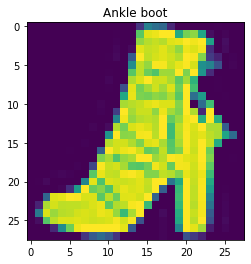

In [55]:
# 11번 이미지 를 출력
# flatten 되어 있으므로, 다시 (28,28)로 reshape 하여 이미지쇼 함수에 입력
plt.imshow(np.reshape(images[11], (28, 28)))
# 11번 target에 해당하는 상품명을 그림의 제목으로
plt.title(targets_names[targets[11]])
# 그림을 보여준다.
plt.show()

In [56]:
# image의 type을 uint8에서 float64로 변경 (왜????)
images = images.astype(float)

In [57]:
# 테스트도 똑값이 바꿔준다.
images_test = images_test.reshape(-1, 784)
images_test = images_test.astype(float)

In [58]:
# 스케일러를 불러서, 정규화 해준다.
# StandardScaler : 평균 = 0 표준편차 = 1
# MinMaxScaler : 최대값 = 1 최소값 = 0 (이상치에 취약하다.) 왜????
# RobustScaler : 중앙값 = 0 IQR = 1 (이상치 영향 최소화)
# MaxAbsScaler : 0을 기준으로 절대값이 가장 큰 수가 1또는 -1이 되도록 변환
# StandardScaler (정규분포용) 클래스를 생성한다.
# StandardScaler 모듈을 임포트
from sklearn.preprocessing import StandardScaler
# StandardScaler 클래스를 생성
scaler = StandardScaler()
# fit: images 데이터 (10000,784)의 784개 컬럼값(feature)에 대해 각각 평균과 표준편차를 구한다. 
# transform : 평균과 표준편차로 각 데이터에 centering과 scaling을 한다. 
images = scaler.fit_transform(images)
# transform : images_test 의 각 데이터에 centering과 scaling을 한다.
images_test = scaler.transform(images_test)

In [59]:
# target 변수에 대한 value count
np.unique(targets, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 942, 1027, 1016, 1019,  974,  989, 1021, 1022,  990, 1000]))

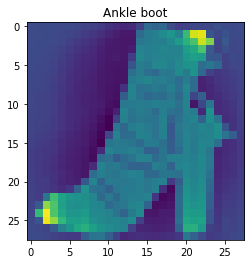

In [60]:
# 11번 이미지 를 출력 (표준화 이후)
plt.imshow(np.reshape(images[11], (28, 28)))
plt.title(targets_names[targets[11]])
plt.show()

In [61]:
# 신경망을 순차적으로 연결한다.
model = tf.keras.models.Sequential()

# 은닉층 1 추가 : 256개 노드, 활성함수는 relu, 입력값은 784개의 feature
model.add(tf.keras.layers.Dense(256, activation="relu",input_shape=(784,)))
# 은닉층 2 추가 : 128개 노드, 활성함수는 relu
model.add(tf.keras.layers.Dense(128, activation="relu"))
# 은닉층 3 추가 : 10개 노드, 활성함수는 소프트맥스
# 이진분류 : 1개노드, 시그모이드 (0~1사이의 확률값으로 해석)
# n중분류 :  n개노드, 소프트맥스
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [62]:
# 작성한 신경망 모델을 찍어본다.
# 파라미터의 수 : (784+1)*256 = 200960 , (256+1)*128 = 32896, (128+1)*10 = 1290
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [63]:
# 훈련에 대한 옵션 (손실함수, 옵티마이저, 평가메트릭)을 지정
# loss : 
# 이진분류 - binary_crossentropy
# 다중분류 - sparse_categorical_crossentropy (label이 정수형인 경우), categorical_crossentropy (label이 one hot처리된 경우)
# 회귀 : mean_squared_error

# optimizer : sgd, rmsprop  

# metrics :
# 분류 : accuracy
# 회귀 : mae
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

In [64]:
# 데이터를 "batch_size" 크기의 "배치"로 분할하고 - default : 32
# 지정된 수의 "epoch"에 대해 - 10
# 검증 셋을 "validation_split" 만큼 - 0.2 (10000개 *0.2 = 2000개)
history = model.fit(images, targets, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
250/250 [==============================] - 1s 4ms/step - loss: 0.8886 - accuracy: 0.7115 - val_loss: 0.6341 - val_accuracy: 0.7745
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.5339 - accuracy: 0.8131 - val_loss: 0.5311 - val_accuracy: 0.7990
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 0.4500 - accuracy: 0.8403 - val_loss: 0.4933 - val_accuracy: 0.8180
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 0.4007 - accuracy: 0.8591 - val_loss: 0.4642 - val_accuracy: 0.8275
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3655 - accuracy: 0.8725 - val_loss: 0.4456 - val_accuracy: 0.8375
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3389 - accuracy: 0.8799 - val_loss: 0.4431 - val_accuracy: 0.8375
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3159 - accuracy: 0.8892 - val_loss: 0.4347 - val_accuracy: 0.8390
Epoch 

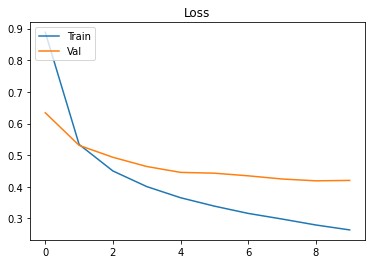

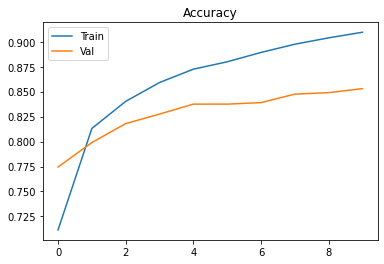

In [65]:
# loss : 훈련 손실값
loss_curve = history.history["loss"]
# accuracy: 훈련 정확도
acc_curve = history.history["accuracy"]
# val_loss : 검증 손실값
loss_val_curve = history.history["val_loss"]
# val_accuracy : 검증 정확도
acc_val_curve = history.history["val_accuracy"]

# 훈련 손실값 그리기 
plt.plot(loss_curve, label="Train")
# 검증 손실값 그리기 
plt.plot(loss_val_curve, label="Val")
# 범례를 왼쪽 위에 표시 
plt.legend(loc='upper left')
# 제목은 Loss로
plt.title("Loss")
# 그래프 보이기, 보여주고, 초기화 됨
plt.show()
# 훈련 정확도 그리기
plt.plot(acc_curve, label="Train")
# 검증 정확도 그리기
plt.plot(acc_val_curve, label="Val")
# 범례를 왼쪽 위에 표시
plt.legend(loc='upper left')
# 제목은 Accuracy로
plt.title("Accuracy")
# 그래프 보이기, 보여주고, 초기화 됨
plt.show()

In [68]:
# 테스트 데이터로 평가해보기 (일반화 성능)
# x, y 를 입력하여, 훈련된 모델에 x를 입력하여 구한 예측치 y_hat값과 y값으로 손실값과 정확도를 구한다.
# 배치로 실행한다. batch_size = 32, 10000 / 32 = 312.5 총 313회 실행
loss, acc = model.evaluate(images_test, targets_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

313/313 [==============================] - 0s 2ms/step - loss: 0.4517 - accuracy: 0.8388
Test Loss 0.45171454548835754
Test Accuracy 0.8388000130653381
